In [1]:
#!pip install google-cloud-bigquery pandas db-dtypes google-cloud-bigquery-storage
import os
from google.cloud import bigquery
import pandas as pd
import pickle

import db_dtypes


print("db-dtypes is installed correctly.")


# Set the credentials for Google BigQuery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "st312-442610-b9934d6c7287.json"
client = bigquery.Client()


db-dtypes is installed correctly.


# i am assumbing we are going from 09/15 - 11/15

In [2]:
from classes import *

### Step 1 - get the transaction hashes for everything we want in the period


In [34]:

query = """
SELECT `hash`
  FROM `bigquery-public-data.crypto_polygon.transactions`
  WHERE to_address = "0x78769d50be1763ed1ca0d5e878d93f05aabff29e"
  AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-08-31 23:59:59"
"""

transaction_hashes = client.query(query).to_dataframe()

transaction_hashes.head()

,hash
0,0x970d8081867ecbbf7079dce0bd0ebf650b7432d00e47...
1,0xe2f7c9c1ac999e2a3ef42295207edf53e34c9d6d2de4...
2,0xf097e4ff5990749c754ce03e783babf6f3fd76bdaee0...
3,0xb1e2e4e31bb89489bfe0d26f0ff40a3056c585d55006...
4,0xd77bd39e31327c2cc4addfc24b4d784d9129aa2302a9...


In [36]:


transaction_hashes.to_csv("transaction_hashes.csv", index=False)
len(transaction_hashes)

1562778

In [2]:
transaction_hashes = pd.read_csv("transaction_hashes.csv")
len(transaction_hashes)

1562778

# Step 2 - get all the logs for each transactions


#### Assumption 1 
* only use orders matched and that all orders matached are 0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65638af6088d149d2ce956c

Cred Evelyne Ong the Second

In [3]:
import time
batch_size = 2500
matched_df = pd.DataFrame()
filled_df = pd.DataFrame()

In [ ]:
batch_size = 10000

In [69]:

batch_size = 10000

#for i in range(0, len(), batch_size):
#for i in range(0, len(transaction_hashes), batch_size):
for i in range(1365000, 1552778,  batch_size):
    # Get the current batch of 100 transaction hashes
    batch_hashes = transaction_hashes['hash'][i:i + batch_size].tolist()

    # Create the IN clause with the batch of hashes
    hashes_in_clause = "', '".join(batch_hashes)



    
    # Prepare the query with the IN clause
    query = f"""
    SELECT transaction_hash, address, `data`, topics, block_timestamp
    FROM `bigquery-public-data.crypto_polygon.logs`
    WHERE transaction_hash IN ('{hashes_in_clause}')
    AND block_timestamp BETWEEN "2024-07-01 00:00:00" AND "2024-08-31 23:59:59"

    """


    
    # Execute the query


    cur_logs = client.query(query).to_dataframe()


    
    # Filter the logs as needed
    orders_matched = cur_logs[cur_logs['topics'].apply(lambda x: x[0] == "0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65638af6088d149d2ce956c")]
    orders_filled = cur_logs[cur_logs['topics'].apply(lambda x: x[0] == "0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06bd0c789af57f2d65bfec0f6")]


    # Concatenate the results
    matched_df = pd.concat([matched_df, orders_matched], ignore_index=True)
    filled_df = pd.concat([filled_df, orders_filled], ignore_index=True)

    time.sleep(5)
    print(f"Processed {i + batch_size} transactions")






Processed 1375000 transactions
Processed 1385000 transactions
Processed 1395000 transactions
Processed 1405000 transactions
Processed 1415000 transactions
Processed 1425000 transactions
Processed 1435000 transactions
Processed 1445000 transactions
Processed 1455000 transactions
Processed 1465000 transactions
Processed 1475000 transactions
Processed 1485000 transactions
Processed 1495000 transactions
Processed 1505000 transactions
Processed 1515000 transactions
Processed 1525000 transactions
Processed 1535000 transactions
Processed 1545000 transactions
Processed 1555000 transactions


In [70]:
len(matched_df)

1554319

In [71]:
matched_df.tail()

,transaction_hash,address,data,topics,block_timestamp
1554314,0xb041efbde31227666d9b844f41e00f296cc524e76611...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-20 19:14:49+00:00
1554315,0x064f0ed65181536f143b7a5b322727d455e50fb3d863...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x3011e4ede0f6befa0ad3f571001d3e1ffeef3d4af78c...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-20 03:13:38+00:00
1554316,0x3d7b4b2a073de6cd4be7d4b8d7352bb3f44106595f8b...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-20 13:07:00+00:00
1554317,0xe0d5952454f24fa20a519112ccd72cf3e52030df74d2...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-20 06:17:38+00:00
1554318,0x996170ae367045c868995820f5c47140044d1799bc0f...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-20 02:36:12+00:00


In [ ]:
len(filled_df)

223342

In [72]:
matched_df.to_csv("matched_orders.csv", index=False)
filled_df.to_csv("filled_orders.csv", index=False)
print("Data has been saved to CSV files.")
matched_df.head()


Data has been saved to CSV files.


,transaction_hash,address,data,topics,block_timestamp
0,0x380606cfaf17eb55c2bb1c5458c8cae937eabf2f5d5f...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x9f400f5eae9852bf9dc987963afa46964cbc3ccd10be...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-07-12 04:15:49+00:00
1,0x12a0ad8c46cc01570150a281ac0db613a80ea17b0e53...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-07-12 23:49:03+00:00
2,0x1da0c99325f410b754d1f38fb9cdbfccdd2a354ec1b2...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-07-12 06:44:27+00:00
3,0x036459ada31684fb609d695648fea4388dbbe3633d0d...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x26e1982cd5541a69971fede6742b9b4f90cbdeacf89a...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-08 14:05:21+00:00
4,0x72fe4845be928b2d549256ee6865811c4c67aec3f0c4...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,[0x63bf4d16b7fa898ef4c4b2b6d90fd201e9c56313b65...,2024-08-08 08:01:42+00:00


In [8]:
## Create a sample!

matched_df = pd.read_csv("matched_orders.csv")
filled_df = pd.read_csv("filled_orders.csv")

matched_df_sample = matched_df.iloc[0:5000]
filled_df_sample = filled_df[filled_df["transaction_hash"].isin(matched_df_sample["transaction_hash"].unique())]

matched_df_sample.to_csv("matched_orders_sample.csv", index=False)
filled_df_sample.to_csv("filled_orders_sample.csv", index=False)
print("Sample data has been saved to CSV files.")



Sample data has been saved to CSV files.


In [9]:
matched_df = pd.read_csv("matched_orders_sample.csv")
filled_df = pd.read_csv("filled_orders_sample.csv")


filled_df

,transaction_hash,address,data,topics,block_timestamp
0,0xbf87a29370b880f6f78dfd85ae9fd04239282d582d3d...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-12 02:52:47+00:00
1,0x970d8081867ecbbf7079dce0bd0ebf650b7432d00e47...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-12 04:32:17+00:00
2,0xefa4d52cdb20699f0c1dd325a6bb3b30de3703f9113e...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-12 21:50:01+00:00
3,0xe60d7096ca2b68c443d3d9503c574e8d666f9a784747...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-08-08 14:23:09+00:00
4,0x9dadfa96b201ec8373dbf5cb9c0a55e9a2414c69eb1c...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x9912b5c57671c9c779d27d5755e0a554be73d918a5aa...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-08-08 04:58:32+00:00
...,...,...,...,...,...
11149,0x55a215bbc23ab7c2a81f9a9c135c42a4b17ebf70c07b...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-22 09:25:51+00:00
11150,0x84f158638a1bbd5f641b6e6d5c52104dc4b34677fba5...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x36d38d5b2a2110f83cd39b91595c95c26fc8b10355a2...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-22 17:22:04+00:00
11151,0x84f158638a1bbd5f641b6e6d5c52104dc4b34677fba5...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-22 17:22:04+00:00
11152,0x55a215bbc23ab7c2a81f9a9c135c42a4b17ebf70c07b...,0xc5d563a36ae78145c45a50134d48a1215220f80a,0x00000000000000000000000000000000000000000000...,['0xd0a08e8c493f9c94f29311604c9de1b4e8c8d4c06b...,2024-07-22 09:25:51+00:00


In [ ]:


## I want to get a sub df of filled df where the transaction hash is in the matched df


2482

# Now we extract the data!



# Step 3-  Now we got the data! We need to process it!

In [10]:


people = People()
stockExchange = StockPortfolio()


def handle_orders(df):



    maker = df.iloc[0]['maker']
    taker = df.iloc[0]['taker']
    maker_asset_id = df.iloc[0]['maker_asset_id']
    taker_asset_id = df.iloc[0]['taker_asset_id']
    maker_amount = df.iloc[0]['maker_amount']
    taker_amount = df.iloc[0]['taker_amount']

    timeStamp = df.iloc[0]['block_timestamp']

    
    

    people.potential_add_person(maker)
    people.potential_add_person(taker)



    if maker_asset_id == "0000000000000000000000000000000000000000000000000000000000000000":
        ### Maker is buying!


        people.people[maker].buy(taker_asset_id, taker_amount, maker_amount, timeStamp) 
        people.people[taker].sell(taker_asset_id, taker_amount, maker_amount, timeStamp)

        stockExchange.add_price(taker_asset_id, timeStamp, maker_amount/taker_amount)

    if taker_asset_id == "0000000000000000000000000000000000000000000000000000000000000000":
        # Taker is selling!
        people.people[taker].buy(maker_asset_id,maker_amount, taker_amount, timeStamp)
        people.people[maker].sell(maker_asset_id, maker_amount, taker_amount, timeStamp) 
        stockExchange.add_price(maker_asset_id, timeStamp, taker_amount/maker_amount)

    




for index, row in matched_df.iloc[0:10000, ].iterrows():

    taker_order_hash = row["topics"][1]

    transaction_hash = row["transaction_hash"]
    
    data = row["data"]
    maker_asset_id = data[2:66]
    taker_asste_id = data[66:130]
    maker_amount = int(data[130:194], 16)
    taker_amount = int(data[194:258], 16)


    ### Now i get into order fillin!

    cur_filled = filled_df[filled_df['transaction_hash'] == transaction_hash].copy()


    cur_filled.loc[:, "takeOrderHash"] = cur_filled["topics"].apply(lambda x: x[1])


    cur_filled = cur_filled[cur_filled["takeOrderHash"] == taker_order_hash]

    if len(cur_filled) == 0:
        pass
    if len(cur_filled) == 1:

        


        cur_filled.loc[:, "maker"] = cur_filled["topics"].apply(lambda x: x[2])
        cur_filled.loc[:, "taker"] = cur_filled["topics"].apply(lambda x: x[3])
        cur_filled.loc[:, "maker_asset_id"] = cur_filled["data"].str[2:66]
        cur_filled.loc[:, "taker_asset_id"] = cur_filled["data"].str[66:130]
        cur_filled.loc[:, "maker_amount"] = cur_filled["data"].str[130:194].apply(lambda x: int(x, 16))
        cur_filled.loc[:, "taker_amount"] = cur_filled["data"].str[194:258].apply(lambda x: int(x, 16))


        subset_df = cur_filled[["maker", "taker", "maker_asset_id", "taker_asset_id", "maker_amount", "taker_amount", "block_timestamp"]]
        
        handle_orders(subset_df)



NameError: name 'People' is not defined

In [21]:
xxx = []

for perp in people.people:

    xxx.append((len(people.people[perp].order_history), perp))


xxx

[(0, '0x0000000000000000000000005e1f859c104cfc94b0fa59359bcffc21ad2108f5'),
 (12682, '0x000000000000000000000000c5d563a36ae78145c45a50134d48a1215220f80a'),
 (71, '0x00000000000000000000000059ee6c6a56d7b00223f0c30f8002c4df762b684d'),
 (1, '0x000000000000000000000000e0b7e9c90bf84274a8465737ed47e6e6b7fc452a'),
 (19, '0x000000000000000000000000c580c51f81c033d7c30044ae0db88a2024c9a7c8'),
 (13, '0x000000000000000000000000a7f4932c595c205cea2f52b21eda94b59713ba74'),
 (13, '0x000000000000000000000000f415d9c1952b9737f45a8435052aceef72f56b0c'),
 (15, '0x00000000000000000000000055b7fec50c38ffa5a40e0c8bc85679f095d14f90'),
 (3, '0x00000000000000000000000089d55904f18f90983a0e94ea4dcd6944fe746ecd'),
 (0, '0x0000000000000000000000001ad240d982fbffda660fbab753ff7694f515092e'),
 (1, '0x000000000000000000000000facb9aa6e2bf984fe1b1e7ce42179793e157f441'),
 (5, '0x000000000000000000000000faf7516f2548bed3469319f439088fbc163a7fff'),
 (2, '0x0000000000000000000000000f1a5c4e6aec79cb6e83a150465f02b4389c6dc0'),
 (1

In [24]:
pd.DataFrame(people.people["0x00000000000000000000000059ee6c6a56d7b00223f0c30f8002c4df762b684d"].order_history).to_csv("ssss.csv", index=False)

In [8]:
### Runniung from a save!

#from classes import *
#import pickle
#with open("./people.pkl", "rb") as f:
#    people = pickle.load(f)


#with open("./exchnage.pkl", "rb") as f:
#    loaded_exchahnge = pickle.load(f)



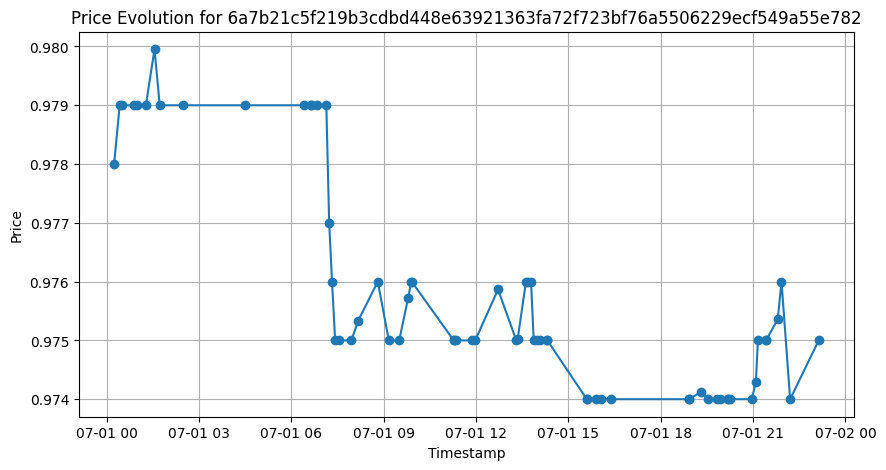

In [9]:
stockExchange.stocks["6a7b21c5f219b3cdbd448e63921363fa72f723bf76a5506229ecf549a55e782"].plot_prices()


In [10]:
oh = people.people["0x000000000000000000000000b7377462b67d5ff70cdfbc108667f91853d0a4f1"].order_history


In [11]:


def calculate_holding_times(oh):
    """
    Calculates the time between purchase and sale for each stock.
    Returns a list of tuples (stock, holding_time in seconds).
    """
    sorted_orders = sorted(oh, key=lambda x: x["time"])
    buy_times = {}  # Store buy timestamps for each stock
    holding_times = []

    print(len(sorted_orders))

    for order in sorted_orders:
        stock = order["stock"]
        if order["action"] == "buy":
            # Store the first buy timestamp for each stock
            if stock not in buy_times:
                buy_times[stock] = order["time"]
        elif order["action"] == "sell" and stock in buy_times:
            print("sep=")
            holding_time = (order["time"] - buy_times[stock]).total_seconds()
            holding_times.append((stock, holding_time))
            # Remove stock after sell to match only the first buy
            del buy_times[stock]

    return holding_times



In [12]:
x = calculate_holding_times(oh)


x

10


[]

In [17]:
oh

[{'action': 'buy',
  'stock': '03c8bffe5605ed296f3b5a2d10a99f438af93ac1d7d1ff7bb358d4fb19a188c',
  'quant': 23527600,
  'cost': 23409962,
  'time': Timestamp('2024-07-01 11:57:07+0000', tz='UTC')},
 {'action': 'buy',
  'stock': 'da8366b737f4bef888b3dfa1f0da10cb0b796cc1b9a84f63d2f4199bfeac705',
  'quant': 190190000,
  'cost': 189999810,
  'time': Timestamp('2024-07-01 11:29:45+0000', tz='UTC')},
 {'action': 'buy',
  'stock': '830a9eeaad984692bdd012e1a22db9e4b6befaebb5db351cf7e7d30dff647c5',
  'quant': 80160000,
  'cost': 79999680,
  'time': Timestamp('2024-07-01 11:30:05+0000', tz='UTC')},
 {'action': 'buy',
  'stock': 'bd09a937517e107787aba0aea132a6a9f43970d501a408f783130c39335b6fe',
  'quant': 56128333,
  'cost': 55959948,
  'time': Timestamp('2024-07-01 11:54:49+0000', tz='UTC')},
 {'action': 'buy',
  'stock': '236e8d8f98f277ec79b90b335c4c77523cd56902277f80804547b0e6b0b7fa9',
  'quant': 50050000,
  'cost': 49999950,
  'time': Timestamp('2024-07-01 11:54:35+0000', tz='UTC')},
 {'actio

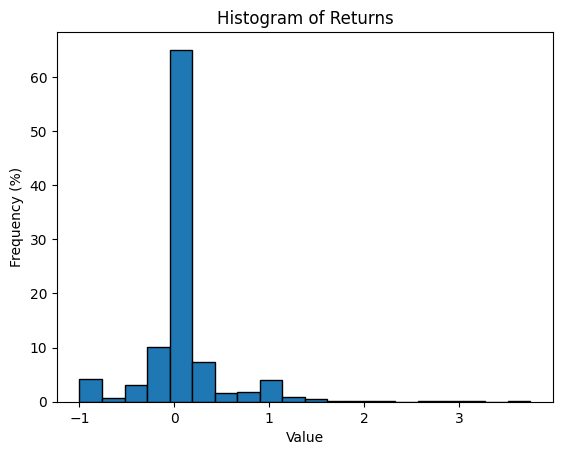

In [14]:
people.plot_returns(stockExchange)

In [15]:


with open("./people.pkl", "wb") as f:
    pickle.dump(people, f)



# saving objects (saves the whole dictionary of objects)
with open("./exchnage.pkl", "wb") as f:
    pickle.dump(stockExchange, f)

In [16]:
import matplotlib.pyplot as plt

# Example list of values


# Create histogram with percentage frequency
plt.hist(returns, bins=20, weights=[100/len(returns)]*len(returns), edgecolor='black')

# Add title and labels
plt.title('Histogram of Returns')
plt.xlabel('Value')
plt.ylabel('Frequency (%)')

# Show the plot
plt.show()


NameError: name 'returns' is not defined

In [ ]:
len(returns)

2059

In [ ]:
counter = 0

for re in returns:
    if re < 0:
        counter += 1


In [ ]:
counter

578

# Step 12 - working out Distribution!

In [ ]:
balances = []
for person in people:
    balances.append(people[person].get_portfolio_value(stockExchange) + people[person].balance)

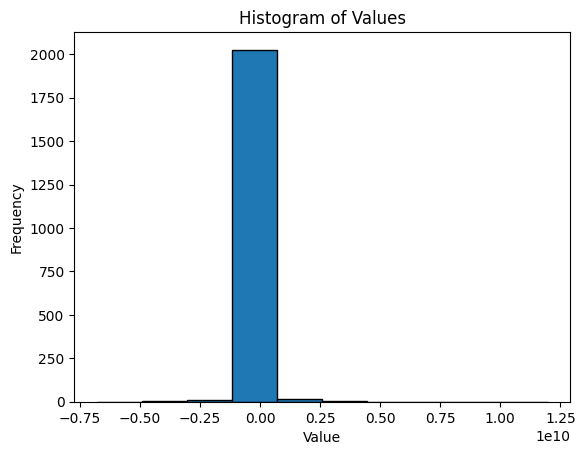

In [ ]:
import matplotlib.pyplot as plt

# Example list of values


# Create histogram
plt.hist(balances, bins=10, edgecolor='black')  # You can adjust the number of bins

# Add title and labels
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


['a', 'b']

In [ ]:
## step 1 class Person



class People:
    def __init__(self):
        self.people = {}

    def add_person(self, unique_id, balance):
        self.people[unique_id] = Person(unique_id, balance)
    
    
    def potential_add_person(self, unique_id):
        if unique_id not in self.people:
            self.add_person(unique_id, 0)

    def plot_returns(self, exchange):
        """
        Plots the returns for each person in the exchange.
        
        :param exchange: StockExchange object.
        """

        returns = []
        for person in self.people.values():
            returns.append(person.get_total_return(exchange))
        

        plt.hist(returns, bins=20, weights=[100/len(returns)]*len(returns), edgecolor='black')


        plt.title('Histogram of Returns')
        plt.xlabel('Value')
        plt.ylabel('Frequency (%)')

        # Show the plot
        plt.show()

    def to_df(self):
        """
        Converts the people dictionary to a DataFrame.
        """
        data = []
        for person in self.people.values():
            data.append({
                "id": person.id,
                "balance": person.balance,
                "portfolio": person.portfolio,
                "total_paid": person.total_paid,
                "total_made": person.total_made,
                "order_history": person.order_history
            })
        return pd.DataFrame(data)



class Person:
    def __init__(self, unique_id, balance):
        self.id = unique_id
        self.balance = balance
        self.portfolio = {}  # {stock_symbol: {"shares": total_shares, "total_cost": total_cost}}
        self.total_paid = 0
        self.total_made = 0
        self.order_history = []


    def buy(self, stock, quantity, total_cost, timeStamp):
        
        self.balance -= total_cost
        
        if stock not in self.portfolio:
            self.portfolio[stock] = {"shares": 0, "total_cost": 0}
        
        self.portfolio[stock]["shares"] += quantity
        self.portfolio[stock]["total_cost"] += total_cost

        self.total_paid += total_cost
        self.order_history.append({'action':"buy", "stock":stock ,"quant":quantity, "cost":total_cost, "time":timeStamp})

    
    def sell(self, stock, quantity, total_revenue, timeStamp):
        if stock not in self.portfolio or self.portfolio[stock]["shares"] < quantity:
            #print("Ignoring as bought before the study period")
            #raise ValueError("Insufficient shares to sell.")
            #print(f"SELLING {stock}")
            #print(self.portfolio)

            if self.id == "0x00000000000000000000000059ee6c6a56d7b00223f0c30f8002c4df762b684d":
                print("trying to sell")
                print(stock)
                print(self.portfolio)
                
            pass

        else:
            print("REAL SELLLLL")
            
            # Calculate the average price per share
            average_price = self.portfolio[stock]["total_cost"] / self.portfolio[stock]["shares"]
            
            # Reduce the number of shares and adjust the total cost proportionally
            self.portfolio[stock]["shares"] -= quantity
            self.portfolio[stock]["total_cost"] -= average_price * quantity
            

            # Add the revenue to the balance
            self.balance += total_revenue

            self.total_made += total_revenue

            self.order_history.append({'action':"sell", "stock":stock, "quant":quantity, "cost":total_revenue, "time":timeStamp})
            
            # Remove the stock entry if all shares are sold
            if self.portfolio[stock]["shares"] == 0:
                del self.portfolio[stock]
            
            

    
    def get_portfolio_value(self, exchange):
        total_value = 0
        for stock, data in self.portfolio.items():
            stock_value = data["shares"] * exchange.stocks[stock].get_latest_price()[1]
            total_value += stock_value
        return total_value
    
    def get_average_price(self, stock):
        if stock in self.portfolio and self.portfolio[stock]["shares"] > 0:
            return self.portfolio[stock]["total_cost"] / self.portfolio[stock]["shares"]
        return 0
    
    def get_total_return(self, exchange):
        if self.total_paid == 0:
            return 0
        total_income = self.total_made + self.get_portfolio_value(exchange)
        total_expense = self.total_paid
        return (total_income - total_expense) / total_expense
    
    def calculate_holding_times(self):
        """
        Calculates the time between purchase and sale for each stock.
        Returns a list of tuples (stock, holding_time in seconds).
        """
        sorted_orders = sorted(self.order_history, key=lambda x: x["time"])
        buy_times = {}  # Store buy timestamps for each stock
        holding_times = []

        for order in sorted_orders:
            stock = order["stock"]
            if order["action"] == "buy":
                # Store the first buy timestamp for each stock
                if stock not in buy_times:
                    buy_times[stock] = order["time"]
            elif order["action"] == "sell" and stock in buy_times:
                holding_time = (order["time"] - buy_times[stock]).total_seconds()
                holding_times.append((stock, holding_time))
                # Remove stock after sell to match only the first buy
                del buy_times[stock]

        return holding_times



import matplotlib.pyplot as plt
from datetime import datetime

class StockPrices:
    def __init__(self, symbol):
        self.symbol = symbol
        self.prices = []  # List of tuples: [(timestamp, price), ...]
    
    def add_price(self, timestamp, price):
        """
        Adds a new price with a timestamp.
        
        :param timestamp: Datetime object representing the time of the sale.
        :param price: Sale price of the stock.
        """

        self.prices.append((timestamp, price))
        self.prices.sort(key=lambda x: x[0], reverse=False)

    
    def get_prices(self):
        """
        Returns the list of recorded prices.
        
        :return: List of tuples [(timestamp, price), ...].
        """
        return self.prices
    
    def plot_prices(self):
        """
        Plots the evolution of stock prices over time.
        """
        if not self.prices:
            print("No prices to plot.")
            return
        
        # Extract timestamps and prices
        timestamps, prices = zip(*self.prices)
        
        # Plot prices
        plt.figure(figsize=(10, 5))
        plt.plot(timestamps, prices, marker="o", linestyle="-")
        plt.title(f"Price Evolution for {self.symbol}")
        plt.xlabel("Timestamp")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()
    
    def get_latest_price(self):
        """
        Retrieves the latest price based on timestamp.
        
        :return: Latest price or None if no prices exist.
        """
        if not self.prices:
            return None
        return self.prices[-1]
    

## AllStocks class

class StockPortfolio:
    def __init__(self):
        self.stocks = {}  # Maps stock symbols to StockPrices objects
    
    def add_stock(self, symbol):
        if symbol not in self.stocks:
            self.stocks[symbol] = StockPrices(symbol)
    
    def add_price(self, symbol, timestamp, price):
        if symbol not in self.stocks:
            self.add_stock(symbol)
        self.stocks[symbol].add_price(timestamp, price)
    
    def get_stock(self, symbol):
        return self.stocks.get(symbol, None)
    
    def plot_all_prices(self):
        for stock in self.stocks.values():
            stock.plot_prices()

# Example Usage
portfolio = StockPortfolio()